In [145]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.feature_selection import mutual_info_regression,SelectKBest,f_regression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [81]:
diamond = pd.read_csv('data/diamonds.csv',index_col=0)

In [82]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [83]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [84]:
dic = {'cut':'category','color':'category','clarity':'category'}
diamond = diamond.astype(dic)

In [85]:
diamond.iloc[:,1:4].value_counts()

cut    color  clarity
Ideal  E      VS2        1136
       G      VS1         953
       D      VS2         920
       G      VS2         910
       F      VS2         879
                         ... 
Fair   H      VVS1          1
       I      VVS1          1
       J      VVS2          1
Good   J      VVS1          1
Fair   J      VVS1          1
Length: 276, dtype: int64

<AxesSubplot:xlabel='carat', ylabel='price'>

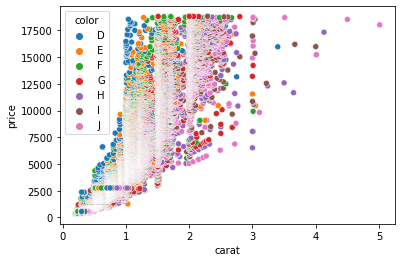

In [86]:
sns.scatterplot(data=diamond,x='carat',y='price',hue='color')

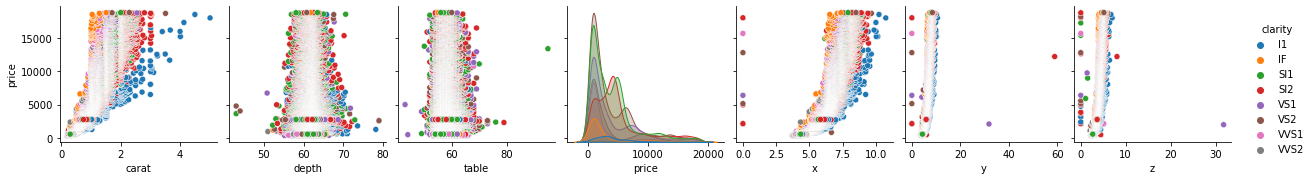

In [87]:
sns.pairplot(diamond,y_vars='price',hue='clarity')

In [89]:
price = diamond.pop('price')

In [136]:
charact_train,charact_test,price_train,price_test = train_test_split(diamond,price,random_state=2708)

# Basic Linear regression

In [165]:
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(
[("cat_trans", categorical_transformer, make_column_selector(dtype_include="category")),
("num_trans", numerical_transformer, make_column_selector(dtype_exclude='category'))])

model = LinearRegression()

pipe = Pipeline(steps=[("transformer", transformer), 
                       ("model", model)])


grid_search = GridSearchCV(pipe,param_grid={},cv=10,scoring='neg_mean_squared_error')

In [166]:
grid_search.fit(charact_train,price_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('cat_trans',
                                                                         OneHotEncoder(drop='first'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0108fb3580>),
                                                                        ('num_trans',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0108fb3c40>)])),
                                       ('model', LinearRegression())]),
             param_grid={}, scoring='neg_mean_squared_error')

In [167]:
best_pipe = grid_search.best_estimator_ 
best_pipe.score(charact_train,price_train)

0.920277203249589

# ElasticNet

In [ ]:
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(
[("cat_trans", categorical_transformer, make_column_selector(dtype_include="category")),
("num_trans", numerical_transformer, make_column_selector(dtype_exclude='category'))])

model = ElasticNet(max_iter=10000)
alpha = [0.00001,0.0001,0.01,0.1,1,10,100]
ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

param = {'model__alpha':alpha,
        'model__l1_ratio':ratio}

pipe = Pipeline(steps=[("transformer", transformer), 
                       ("model", model)])

grid_search = GridSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')

In [138]:
grid_search.fit(charact_train,price_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('cat_trans',
                                                                         OneHotEncoder(drop='first'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f01072e1520>),
                                                                        ('num_trans',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f01072e1700>)])),
                                       ('model', ElasticNet(max_iter=10000))]),
             param_grid={'model__alpha': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100],
                         'model__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7

In [139]:
cv_scores = grid_search.cv_results_
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results['RMSE_train'] = np.sqrt(-grid_results['mean_test_score'])
display(grid_results.sort_values(by='rank_test_score'))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,RMSE_train
11,0.369134,0.232877,0.006321,0.000054,0.0001,0.3,"{'model__alpha': 0.0001, 'model__l1_ratio': 0.3}",-1.274849e+06,-1.505540e+06,-1.272404e+06,...,-1.139127e+06,-1.405045e+06,-1.239563e+06,-1.244838e+06,-1.265449e+06,-1.209765e+06,-1.282686e+06,97197.048792,1,1132.557337
10,0.382687,0.247166,0.006455,0.000226,0.0001,0.2,"{'model__alpha': 0.0001, 'model__l1_ratio': 0.2}",-1.274492e+06,-1.505135e+06,-1.272269e+06,...,-1.139108e+06,-1.405357e+06,-1.239457e+06,-1.245035e+06,-1.265799e+06,-1.209834e+06,-1.282688e+06,97135.027247,2,1132.557947
12,0.369033,0.235247,0.006433,0.000209,0.0001,0.4,"{'model__alpha': 0.0001, 'model__l1_ratio': 0.4}",-1.275223e+06,-1.505964e+06,-1.272553e+06,...,-1.139161e+06,-1.404744e+06,-1.239686e+06,-1.244649e+06,-1.265107e+06,-1.209708e+06,-1.282698e+06,97260.277558,3,1132.562486
9,0.484116,0.257087,0.007382,0.001283,0.0001,0.1,"{'model__alpha': 0.0001, 'model__l1_ratio': 0.1}",-1.274151e+06,-1.504747e+06,-1.272146e+06,...,-1.139102e+06,-1.405677e+06,-1.239366e+06,-1.245239e+06,-1.266158e+06,-1.209915e+06,-1.282702e+06,97074.211851,4,1132.564140
13,0.439515,0.377016,0.006660,0.000547,0.0001,0.5,"{'model__alpha': 0.0001, 'model__l1_ratio': 0.5}",-1.275614e+06,-1.506405e+06,-1.272715e+06,...,-1.139209e+06,-1.404452e+06,-1.239825e+06,-1.244469e+06,-1.264775e+06,-1.209665e+06,-1.282723e+06,97324.713178,5,1132.573573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.043404,0.000527,0.006276,0.000024,100,0.5,"{'model__alpha': 100, 'model__l1_ratio': 0.5}",-1.382021e+07,-1.427598e+07,-1.451966e+07,...,-1.399265e+07,-1.394051e+07,-1.457686e+07,-1.395500e+07,-1.364347e+07,-1.503160e+07,-1.413792e+07,431275.897049,59,3760.041953
57,0.043330,0.000465,0.006287,0.000058,100,0.4,"{'model__alpha': 100, 'model__l1_ratio': 0.4}",-1.408066e+07,-1.454859e+07,-1.478771e+07,...,-1.425550e+07,-1.420466e+07,-1.484369e+07,-1.421783e+07,-1.389726e+07,-1.530858e+07,-1.440207e+07,437716.981885,60,3795.006571
56,0.043805,0.000940,0.006383,0.000337,100,0.3,"{'model__alpha': 100, 'model__l1_ratio': 0.3}",-1.427261e+07,-1.474971e+07,-1.498521e+07,...,-1.444921e+07,-1.439936e+07,-1.504028e+07,-1.441156e+07,-1.408430e+07,-1.551267e+07,-1.459677e+07,442463.300761,61,3820.572086
55,0.043448,0.000550,0.006489,0.000672,100,0.2,"{'model__alpha': 100, 'model__l1_ratio': 0.2}",-1.441994e+07,-1.490417e+07,-1.513675e+07,...,-1.459787e+07,-1.454880e+07,-1.519114e+07,-1.456025e+07,-1.422784e+07,-1.566928e+07,-1.474620e+07,446105.673750,62,3840.077814


In [140]:
test_r2 = grid_search.best_estimator_.score(charact_test,price_test)
train_r2 = grid_search.best_estimator_.score(charact_train,price_train)
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

Train R²: 0.9202554296898524
Test R²: 0.9181926833370497


In [141]:
best_pipe =  grid_search.best_estimator_
coefs = best_pipe.named_steps['model'].coef_

In [142]:
cat_encoder = best_pipe.named_steps['transformer'].named_transformers_['cat_trans']

In [143]:
cat_encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [168]:
best_pipe.score(charact_test,price_test)

0.9182555067988474

# Random Forest

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(
[("cat_trans", categorical_transformer, make_column_selector(dtype_include="category")),
("num_trans", numerical_transformer, make_column_selector(dtype_exclude='category'))])

forest_reg = RandomForestRegressor()

n_estim = [3,10,30,100]
min_leaf= [1,10,100,250]

param = {'model__n_estimators':n_estim,
        'model__min_samples_leaf':min_leaf}


pipe = Pipeline(steps=[("transformer", transformer), 
                       ("model", forest_reg)])

grid_search = RandomizedSearchCV(pipe,param,cv=10,scoring='neg_mean_squared_error')

In [196]:
grid_search.fit(charact_train,price_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('cat_trans',
                                                                               OneHotEncoder(drop='first'),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f0103a935b0>),
                                                                              ('num_trans',
                                                                               StandardScaler(),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f0103a936a0>)])),
                                             ('model',
                                              RandomForestRegressor())]),
                   param_distributions={'model__min_samples_le

In [197]:
grid_results = pd.DataFrame(grid_search.cv_results_)

In [198]:
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,5.682099,0.101260,0.035314,0.001256,100,100,"{'model__n_estimators': 100, 'model__min_sampl...",-8.865030e+05,-1.144732e+06,-8.860383e+05,-1.076454e+06,-9.249173e+05,-1.032771e+06,-9.525226e+05,-8.483356e+05,-9.343805e+05,-9.556186e+05,-9.642273e+05,88378.678155,5
1,0.871829,0.006160,0.010528,0.000087,10,10,"{'model__n_estimators': 10, 'model__min_sample...",-5.213188e+05,-6.088968e+05,-4.652056e+05,-6.270882e+05,-5.608261e+05,-5.458778e+05,-5.111582e+05,-5.134163e+05,-4.854346e+05,-5.516147e+05,-5.390837e+05,48358.055605,4
2,4.536752,0.046947,0.030186,0.000770,100,250,"{'model__n_estimators': 100, 'model__min_sampl...",-1.319744e+06,-1.529726e+06,-1.293143e+06,-1.474378e+06,-1.344901e+06,-1.408164e+06,-1.393777e+06,-1.276016e+06,-1.283286e+06,-1.389085e+06,-1.371222e+06,80120.666638,9
3,2.585626,0.063950,0.020281,0.000595,30,10,"{'model__n_estimators': 30, 'model__min_sample...",-4.983589e+05,-5.924579e+05,-4.657005e+05,-6.152098e+05,-5.424933e+05,-5.365516e+05,-4.848352e+05,-4.855954e+05,-4.602817e+05,-5.307801e+05,-5.212264e+05,49597.822646,3
4,0.201434,0.001433,0.007093,0.000389,3,100,"{'model__n_estimators': 3, 'model__min_samples...",-8.986162e+05,-1.142523e+06,-9.070463e+05,-1.198701e+06,-9.859374e+05,-1.059007e+06,-9.503473e+05,-8.306848e+05,-9.167893e+05,-1.065953e+06,-9.955605e+05,111625.889053,8
5,1.305464,0.009715,0.015461,0.000106,10,1,"{'model__n_estimators': 10, 'model__min_sample...",-4.366032e+05,-4.981963e+05,-4.235903e+05,-5.249424e+05,-5.033955e+05,-4.103155e+05,-4.498797e+05,-4.347484e+05,-4.557785e+05,-4.548287e+05,-4.592278e+05,35608.884910,1
6,1.382777,0.011745,0.013704,0.000581,30,250,"{'model__n_estimators': 30, 'model__min_sample...",-1.316266e+06,-1.531218e+06,-1.290924e+06,-1.479121e+06,-1.339454e+06,-1.420618e+06,-1.406851e+06,-1.280737e+06,-1.286720e+06,-1.391089e+06,-1.374300e+06,81887.297540,10
7,0.606348,0.012864,0.009422,0.000499,10,100,"{'model__n_estimators': 10, 'model__min_sample...",-9.047798e+05,-1.165246e+06,-9.121676e+05,-1.103258e+06,-9.549176e+05,-1.027355e+06,-9.640773e+05,-8.505481e+05,-9.233274e+05,-9.755842e+05,-9.781260e+05,91020.249081,7
8,8.548412,0.141613,0.054888,0.004304,100,10,"{'model__n_estimators': 100, 'model__min_sampl...",-4.994671e+05,-5.818560e+05,-4.523901e+05,-5.967727e+05,-5.469558e+05,-5.207421e+05,-4.844577e+05,-4.921234e+05,-4.494485e+05,-5.244168e+05,-5.148630e+05,47131.280797,2
9,1.755986,0.067524,0.015051,0.000544,30,100,"{'model__n_estimators': 30, 'model__min_sample...",-8.831580e+05,-1.156634e+06,-8.954854e+05,-1.077080e+06,-9.561219e+05,-1.038513e+06,-9.636926e+05,-8.363066e+05,-9.394975e+05,-9.727905e+05,-9.719279e+05,91155.765401,6


In [203]:
total_fit_time = grid_results.mean_fit_time.mul(10).sum()

In [205]:
total_fit_time/60

4.5794546167055765

In [199]:
best_pipe = grid_search.best_estimator_

In [200]:
best_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_trans',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0103a576a0>),
                                                 ('num_trans', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0103a57ac0>)])),
                ('model', RandomForestRegressor(n_estimators=10))])

In [202]:
best_pipe.score(charact_train,price_train)

0.9949537899200707

In [201]:
best_pipe.score(charact_test,price_test)

0.9726921733810119